<a href="https://colab.research.google.com/github/aniketDL/CricketVsBaseball_Classification/blob/master/CricketVsBaseball_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.callbacks import *
import os
from fastai.basic_train import Learner, LearnerCallback

In [0]:
path = Path('/content/sports')

In [0]:
folder = 'baseball'
file = 'urls_baseball.csv'

In [0]:
download_images(path/file, path/folder, max_pics = 300)

In [0]:
classes = ['cricket','baseball']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train='.',valid_pct = 0.2, bs = 64, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [37]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.770000,0.343338,0.883929,00:07
1,0.479046,0.203409,0.919643,00:07
2,0.349497,0.191388,0.928571,00:07
3,0.281482,0.195687,0.928571,00:07


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [40]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


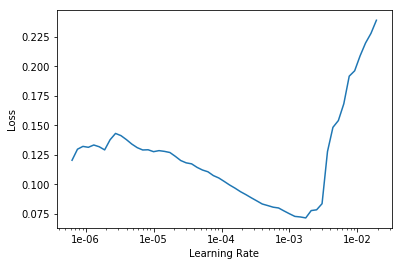

In [41]:
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(4,max_lr=slice(1e-05,1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.014150,0.300396,0.937500,00:06
1,0.012829,0.283823,0.937500,00:06
2,0.008793,0.278843,0.928571,00:06
3,0.009316,0.273727,0.937500,00:06


In [60]:
learn.lr_find(start_lr=1e-5, end_lr=1e-4)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


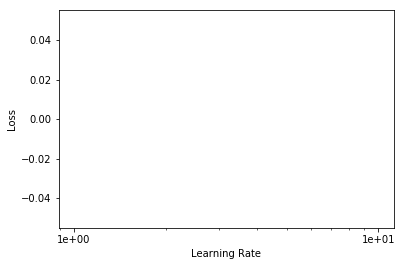

In [61]:
learn.recorder.plot()

In [69]:
learn.fit_one_cycle(4,max_lr=slice(2e-04,1e-04),callbacks=[SaveModelCallback(learn,monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,time
0,0.008458,0.198171,0.964286,00:06
1,0.005420,0.222845,0.946429,00:06
2,0.008114,0.202056,0.964286,00:06
3,0.007369,0.170324,0.964286,00:06


Better model found at epoch 0 with accuracy value: 0.9642857313156128.


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

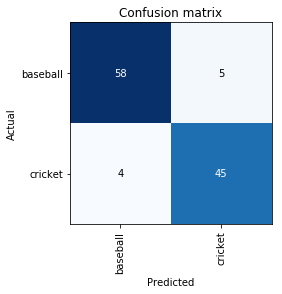

In [53]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

In [0]:
learn = load_learner(path)